In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

# For getting IDs of all rxns
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

model1.objective =  'r_4046' # NGAM #'r_1714' #glc
solution1 = model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')

# Glc max at 0.05 GR and another round for 0.3 GR

growth_rates = [0.049, 0.100, 0.151, 0.203, 0.25, 0.301]
glucose_uptakes = [-0.82938, -1.471569, -2.013761, -2.668543, -3.260365, -3.902555]

all_fluxes_NGAM_min_MDH_knock_out = pd.DataFrame(columns=['Glucose uptake', 'Growth rate', *all_fluxes.index], index=range(len(growth_rates))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):
    print(i)
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")
    # model.reactions.r_0714.knock_out() # knock-out malate dehydrognase - cMDH2
    model.reactions.r_0714.bounds = 0, 0
    model.reactions.r_4041.bounds = growth_rates[i], growth_rates[i]
    model.reactions.r_1714.bounds = (glucose_uptakes[i]), (glucose_uptakes[i]) #-9999, 9999 # 
    model.objective ='r_4046' # NGAM # 'r_1714' # glc
    solution = model.optimize('minimize')
    all_fluxes_NGAM_min_MDH_knock_out.loc[i] = solution.fluxes[['r_1714', 'r_4041', *all_fluxes.index]].values
    
# Exchange fluxes
exchange_fluxes_table = all_fluxes_NGAM_min_MDH_knock_out[['r_4041', 'r_1714', 'r_1992', 'r_1654','r_2060','r_2005', 'r_1672']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(model.reactions, exchange_fluxes_table.columns[i]).name})

PPP_fluxes = all_fluxes_NGAM_min_MDH_knock_out[['r_4041', 'r_1714', 'r_0466', 'r_1049', 'r_1048','r_1050', 't_0081', 'r_0450','r_0959','r_0961']]
# Change G6PDH2rp column name to oxpp 

for i in range(len(PPP_fluxes.columns)):
    PPP_fluxes = PPP_fluxes.rename(columns = {PPP_fluxes.columns[i]: getattr(model.reactions, PPP_fluxes.columns[i]).name})

PPP_fluxes = PPP_fluxes.rename(columns = {'glucose 6-phosphate dehydrogenase': 'oxpp'})

# ATPM and ACITL fluxes 
ATPM_ACITL_fluxes = all_fluxes_NGAM_min_MDH_knock_out[['r_4041', 'r_1714', 'y200003', 'r_4046']] 
for i in range(len(ATPM_ACITL_fluxes.columns)):
    ATPM_ACITL_fluxes = ATPM_ACITL_fluxes.rename(columns = {ATPM_ACITL_fluxes.columns[i]: getattr(model.reactions, ATPM_ACITL_fluxes.columns[i]).name})

# # Get all fluxes to excel

# with pd.ExcelWriter(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\\NP11_{all_fluxes_glc_max_MDH_knock_out}.xlsx') as excel_writer:
#     all_fluxes_glc_max_MDH_knock_out.to_excel(excel_writer, sheet_name='Growth rates 0.05-0.3', index=True)

# #  Get all flux values separately for dif growth rates, make them to a csv file
# # for i in range(len(glucose_uptakes)):
# all_fluxes_NGAM_min_knock_out.loc[0].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\NP11_fluxes_NGAM_min_MDH_knockout_GR_{growth_rates[0]}.csv' , index=True)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21
0
1
2
3
4
5


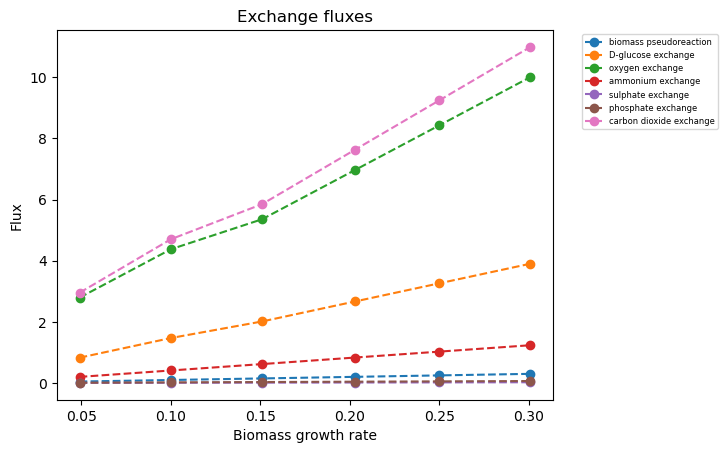

,biomass pseudoreaction,D-glucose exchange,oxygen exchange,ammonium exchange,sulphate exchange,phosphate exchange,carbon dioxide exchange
0,0.049,-0.82938,-2.793307,-0.201355,-0.004165,-0.010756,2.953556
1,0.1,-1.471569,-4.374355,-0.410939,-0.008501,-0.02195,4.701383
2,0.151,-2.013761,-5.3556,-0.62054,-0.012836,-0.033174,5.849378
3,0.203,-2.668543,-6.967721,-0.834237,-0.017257,-0.044599,7.631542
4,0.25,-3.260365,-8.424827,-1.027384,-0.021252,-0.054924,9.242342
5,0.301,-3.902555,-10.005947,-1.236942,-0.025588,-0.066119,10.990224


In [2]:
# Exchange fluxes plot

plt.plot(growth_rates, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

exchange_fluxes_table

In [3]:
PPP_fluxes


,biomass pseudoreaction,D-glucose exchange,oxpp,transketolase 1,transaldolase,transketolase 2,phosphoketolase,fructose-bisphosphate aldolase,pyruvate decarboxylase,pyruvate dehydrogenase
0,0.049,-0.82938,0.292493,0.0,-0.369703,-0.008294,0.28702,0.0,0.865831,0.0
1,0.1,-1.471569,0.607453,0.065366,0.065366,0.04844,0.400184,0.653666,0.0,1.422902
2,0.151,-2.013761,0.0,-0.61838,-0.880188,-0.643938,1.838273,0.0,0.0,1.313475
3,0.203,-2.668543,0.0,-0.792634,-1.183301,-0.826993,2.355226,0.0,0.0,1.765796
4,0.25,-3.260365,0.0,-0.950128,-0.950128,-0.992443,2.82246,0.507143,0.0,2.174632
5,0.301,-3.902555,0.0,-1.121023,-1.754542,-1.17197,3.329448,0.0,0.0,2.618272


In [4]:
ATPM_ACITL_fluxes

,biomass pseudoreaction,D-glucose exchange,ATP-citrate lyase,non-growth associated maintenance reaction
0,0.049,-0.82938,0.0,3.3928
1,0.1,-1.471569,0.0,3.3928
2,0.151,-2.013761,0.0,3.3928
3,0.203,-2.668543,0.0,3.3928
4,0.25,-3.260365,0.0,3.3928
5,0.301,-3.902555,0.0,3.3928


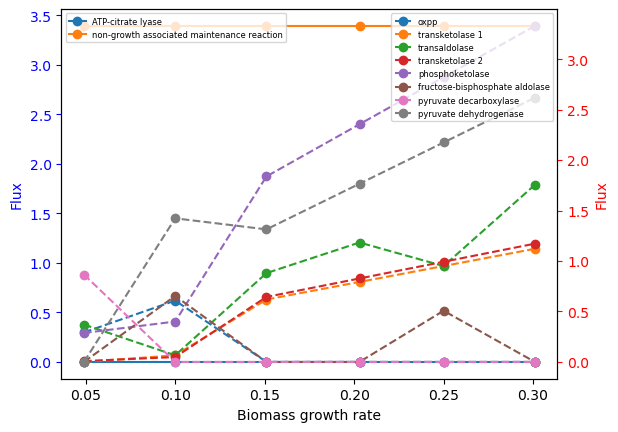

In [5]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis

# Sample data
x = growth_rates
y1 = np.abs(ATPM_ACITL_fluxes[['ATP-citrate lyase', 'non-growth associated maintenance reaction']])
y2 = np.abs(PPP_fluxes[['oxpp', 'transketolase 1', 'transaldolase', 'transketolase 2',	'phosphoketolase',	'fructose-bisphosphate aldolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase']])

fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATP-citrate lyase', 'non-growth associated maintenance reaction'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'transketolase 1', 'transaldolase', 'transketolase 2',	'phosphoketolase',	'fructose-bisphosphate aldolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [6]:
# Get all fluxes to excel

# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\\NP11_fluxes_NGAM_min_MDH_knock_out.xlsx') as excel_writer:
#     all_fluxes_NGAM_min_MDH_knock_out.to_excel(excel_writer, sheet_name='Growth rates 0.05-0.3', index=True)

#  Get all flux values separately for dif growth rates, make them to a csv file
# for i in range(len(glucose_uptakes)):
# all_fluxes_glc_max_MDH_knock_out.loc[0].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\NP11\NP11_fluxes_glc_max_MDH_knockout_GR_{growth_rates[0]}.csv' , index=True)
